<a href="https://colab.research.google.com/github/SabilarRosyad/PCVK_GENAP_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

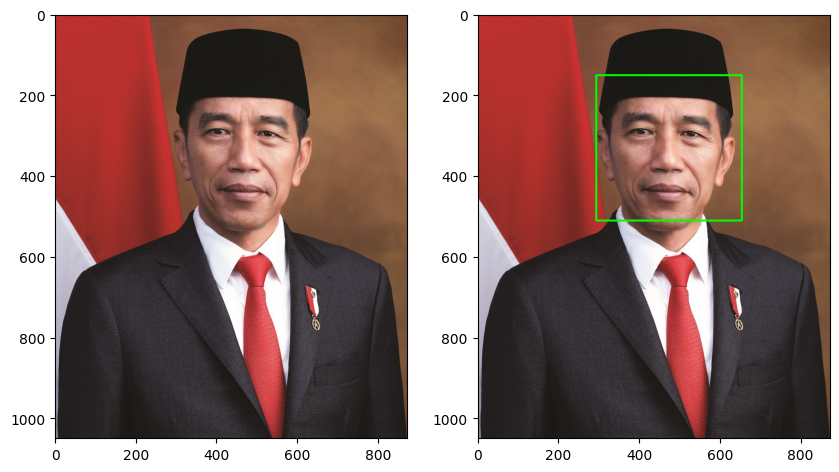

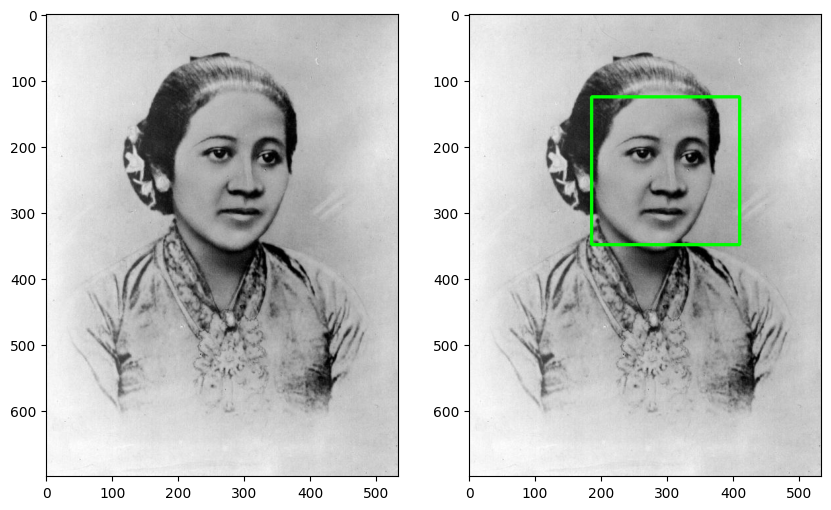

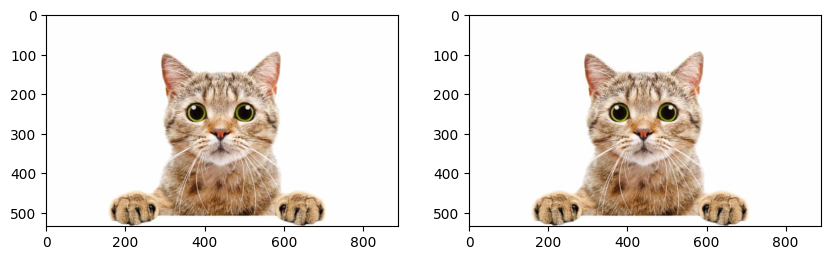

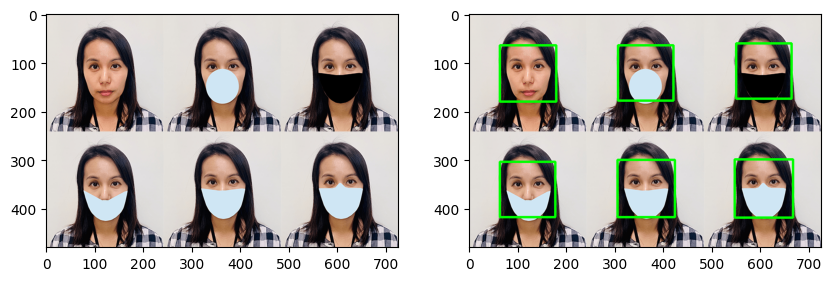

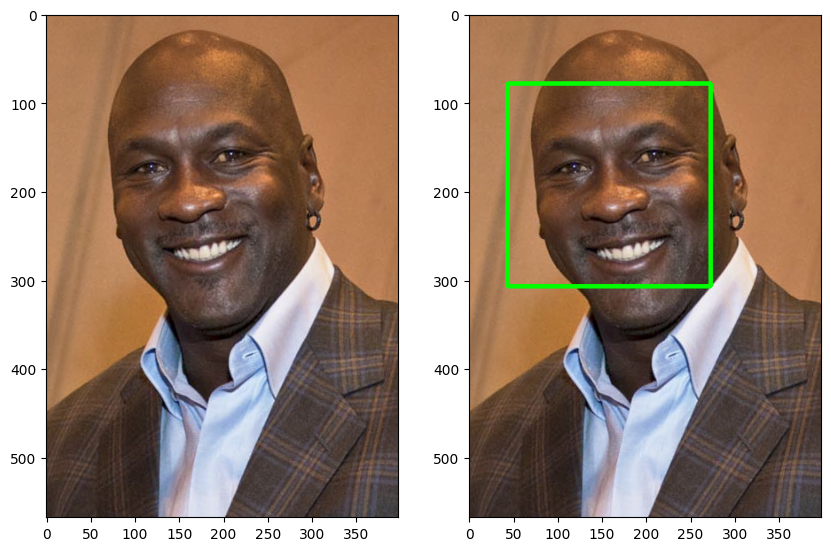

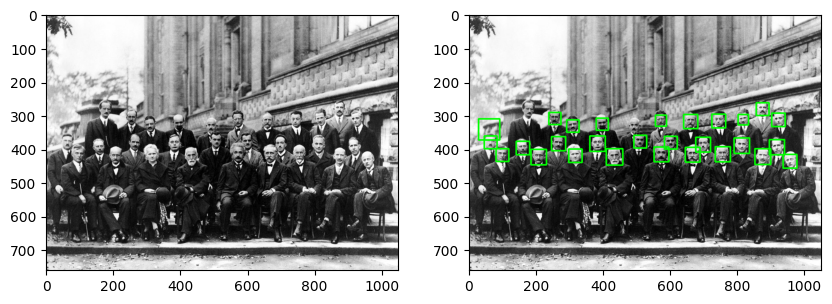

In [5]:
def detect_face(img, cascade):
  cascade_wajah = cv.CascadeClassifier(cascade)
  img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img_1 = img_rgb.copy()
  roi_wajah = cascade_wajah.detectMultiScale(img_1)

  for(x,y,w,h) in roi_wajah:
    cv.rectangle(img_1,(x,y),(x+w,y+h),(0,255,0), 4)

  plt.figure(figsize = (10,10))
  plt.subplot(121), plt.imshow(img_rgb)
  plt.subplot(122), plt.imshow(img_1)

path = '/content/drive/MyDrive/PCVK/Images/facedet'
list_face = ['jokowi.jpg', 'kartini.jpg', 'kucing.jpg', 'mask.png', 'mjordan.jpg', 'solvayconf.jpg']

for name_file in list_face:
  img = cv.imread(os.path.join(path, name_file))
  cascade = '/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalface_alt.xml'
  detect_face(img, cascade)

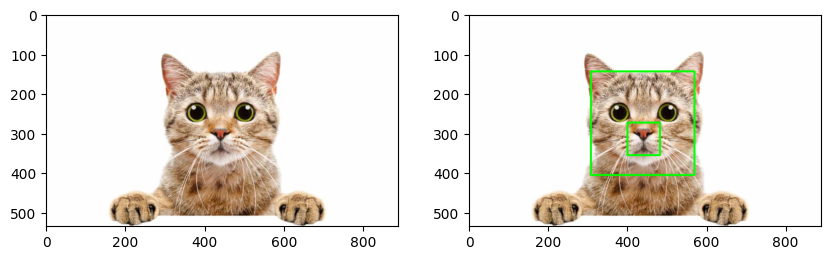

In [6]:
cat_image = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/kucing.jpg')
cascade = '/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalcatface.xml'
detect_face(cat_image, cascade)

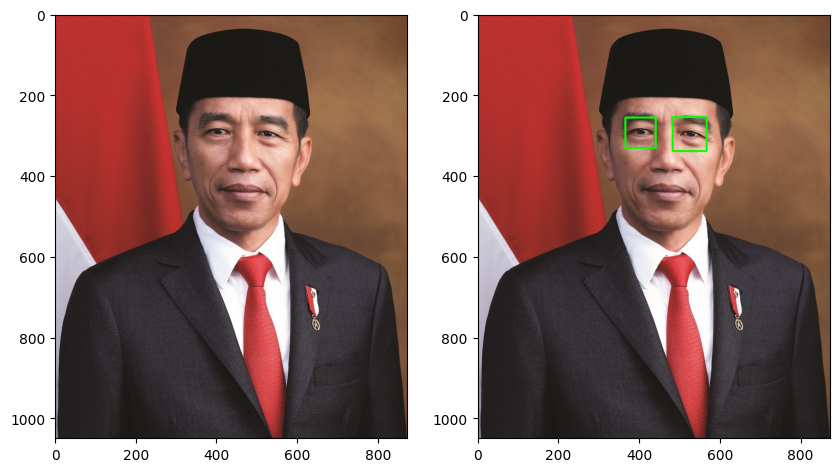

In [7]:
path = '/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg'

img = cv.imread(path)
cascade = '/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_eye.xml'
detect_face(img, cascade)

In [11]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


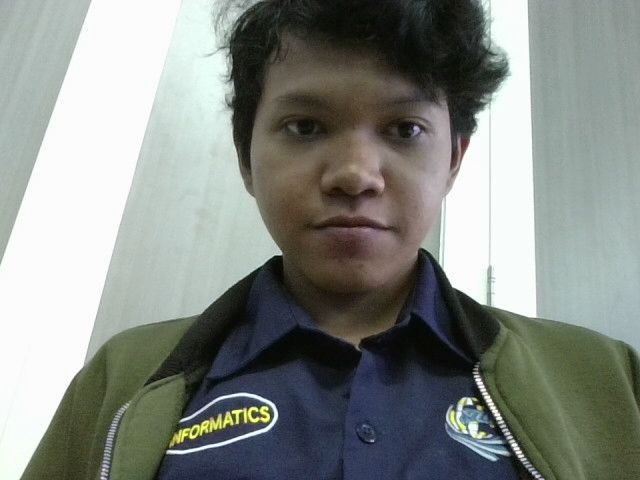

In [12]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

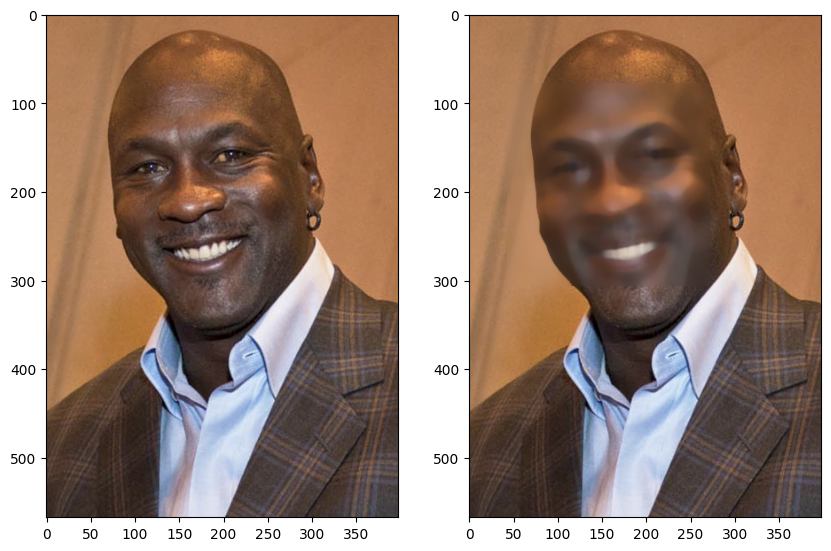

In [15]:
def blur_face(img):
  cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalface_alt.xml')
  img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img_1 = img_rgb.copy()
  roi_wajah = cascade_wajah.detectMultiScale(img_1)

  for(x,y,w,h) in roi_wajah:
    roi = img_1[y:y+h, x:x+w]
    blur = cv.medianBlur(roi, 15)
    img_1[y:y+h, x:x+w] = blur

  plt.figure(figsize = (10,10))
  plt.subplot(121), plt.imshow(img_rgb)
  plt.subplot(122), plt.imshow(img_1)

path = '/content/drive/MyDrive/PCVK/Images/facedet/mjordan.jpg'

img = cv.imread(path)
blur_face(img)

##Tugas

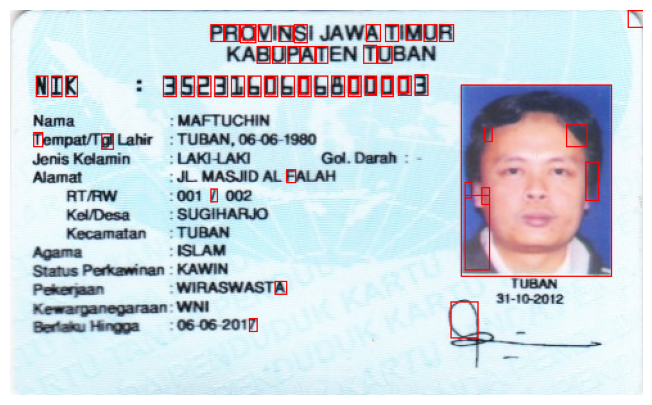

In [16]:

from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
ktp = cv.imread("/content/drive/MyDrive/PCVK/KTP_More/ktp4.png")

# Filtering dengan Gaussian Blur
blurred = cv.GaussianBlur(ktp, (5, 5), 0)

# Ubah ke citra keabuan
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Binerisasi citra dengan Adaptive Thresholding
bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 5)

# Ekstraksi kontur
contours, hierarchy = cv.findContours(bw.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Gambar hasil biner
plt.figure(figsize=(15, 5))

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 10 and w >= 5 and float(ras) <= 1:
        cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Gambar hasil akhir
plt.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

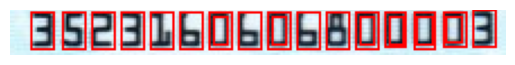

In [17]:

cropped_nik = ktp[50:70, 110:330]

plt.imshow(cv.cvtColor(cropped_nik, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [18]:
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam

# Load dataset MNIST
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Jumlah data yang ingin diambil dari setiap kategori
num_samples_per_class = 100

# List digit yang akan diambil (0 sampai 9)
digits_to_extract = list(range(10))

# Fungsi untuk mengambil sampel dari setiap kategori
def extract_samples(X, y, digits, num_samples):
    samples = []
    for digit in digits:
        digit_indices = np.where(y == digit)[0]
        selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
        samples.extend([(X[i], digit) for i in selected_indices])
    return samples

# Ambil sampel dari setiap kategori
training_data = extract_samples(X_train, y_train, digits_to_extract, num_samples_per_class)

# Acak urutan data
np.random.shuffle(training_data)

# Pisahkan fitur dan label
X, Y = zip(*training_data)

# Konversi menjadi numpy array
X = np.array(X).reshape(-1, 28, 28, 1)

# Tulis ke file pickle
pickle_out = open("X_mnist.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y_mnist.pickle", "wb")
pickle.dump(to_categorical(Y, num_classes=10), pickle_out)
pickle_out.close()

11490434/11490434 [==============================] - 0s 0us/step


In [19]:
# Load file pickle
pickle_in = open("X_mnist.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y = pickle.load(pickle_in)

width, height = 28, 28  # Sesuaikan dengan ukuran gambar MNIST

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(10, activation='softmax')(fc_layer)

adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, Y, epochs=20, verbose=1)
model.save('anpr.model')

Epoch 1/20
32/32 [==============================] - 6s 33ms/step - loss: 6.4172 - accuracy: 0.1460
Epoch 2/20
32/32 [==============================] - 1s 31ms/step - loss: 1.6971 - accuracy: 0.4290
Epoch 3/20
32/32 [==============================] - 1s 34ms/step - loss: 0.9785 - accuracy: 0.6870
Epoch 4/20
32/32 [==============================] - 1s 18ms/step - loss: 0.6265 - accuracy: 0.8010
Epoch 5/20
32/32 [==============================] - 1s 17ms/step - loss: 0.4500 - accuracy: 0.8650
Epoch 6/20
32/32 [==============================] - 1s 17ms/step - loss: 0.3343 - accuracy: 0.9010
Epoch 7/20
32/32 [==============================] - 1s 17ms/step - loss: 0.2419 - accuracy: 0.9360
Epoch 8/20
32/32 [==============================] - 1s 17ms/step - loss: 0.1834 - accuracy: 0.9570
Epoch 9/20
32/32 [==============================] - 1s 17ms/step - loss: 0.1336 - accuracy: 0.9740
Epoch 10/20
32/32 [==============================] - 1s 17ms/step - loss: 0.1057 - accuracy: 0.9790
Epoch 11/

In [20]:
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
from keras.utils import to_categorical

# Load dataset MNIST yang sudah disiapkan sebelumnya
pickle_in = open("X_mnist.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y_test = pickle.load(pickle_in)

# Normalisasi data testing
X_test = X_test / 255.0

# Load model yang sudah di-training sebelumnya
model = tf.keras.models.load_model("anpr.model")

# Lakukan prediksi pada data testing
predictions = model.predict(X_test)

# Ubah label ke dalam format one-hot encoding
Y_test_one_hot = to_categorical(Y_test)

# Evaluasi performa model
accuracy = model.evaluate(X_test, Y_test)[1]
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

32/32 [==============================] - 0s 6ms/step - loss: 2.2568 - accuracy: 0.9900
Accuracy on the test set: 99.00%


32/32 [==============================] - 0s 6ms/step


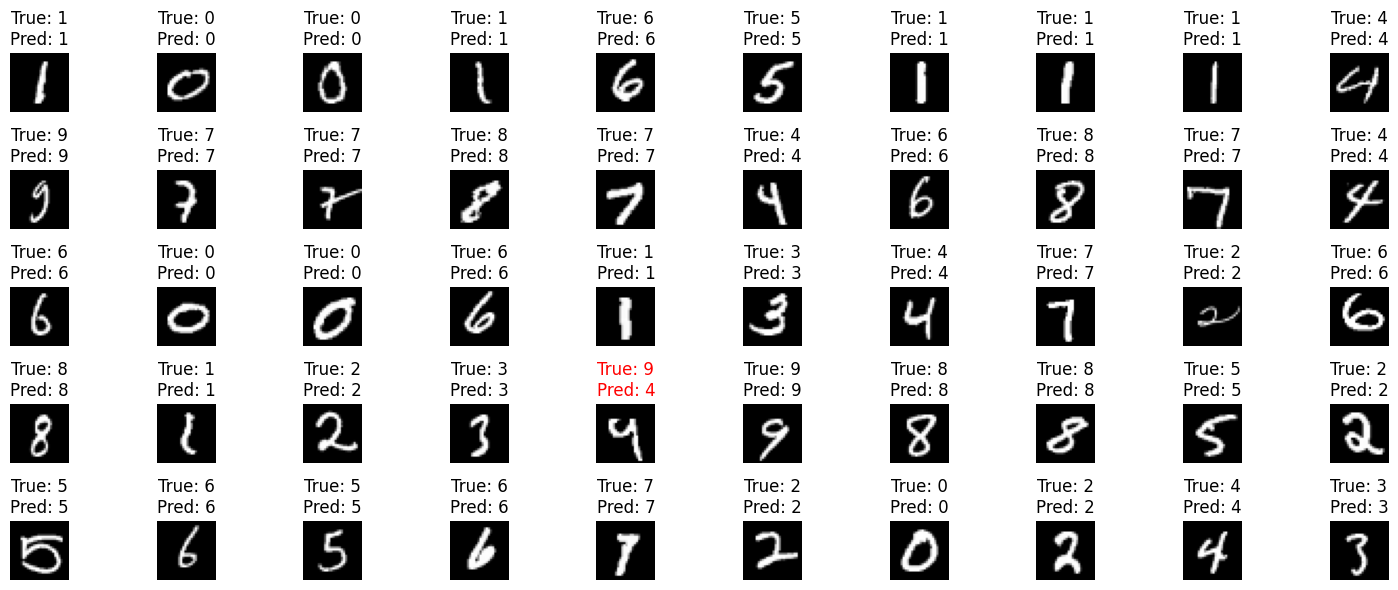

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan gambar dan label
def show_images(images, true_labels, predicted_labels):
    plt.figure(figsize=(15, 6))
    for i in range(len(images)):
        plt.subplot(5, 10, i + 1)
        plt.imshow(images[i][:, :, 0], cmap='gray')

        # Tentukan warna teks berdasarkan prediksi yang benar atau salah
        text_color = 'red' if true_labels[i] != predicted_labels[i] else 'black'

        plt.title(f'True: {true_labels[i]}\nPred: {predicted_labels[i]}', color=text_color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load dataset MNIST yang sudah disiapkan sebelumnya
pickle_in = open("X_mnist.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y_test = pickle.load(pickle_in)

# Normalisasi data testing
X_test = X_test / 255.0

# Load model yang sudah di-training sebelumnya
model = tf.keras.models.load_model("anpr.model")

# Lakukan prediksi pada data testing
predictions = model.predict(X_test)

# Ambil label yang benar (tanpa one-hot encoding)
true_labels = Y_test.argmax(axis=1)

# Ambil label prediksi (tanpa one-hot encoding)
predicted_labels = np.argmax(predictions, axis=1)

# Pilih 50 gambar secara acak untuk ditampilkan
num_samples_to_show = 50
sample_indices = np.random.choice(len(X_test), num_samples_to_show, replace=False)

# Tampilkan gambar dan labelnya
show_images(X_test[sample_indices], true_labels[sample_indices], predicted_labels[sample_indices])

140.0 (381, 608)


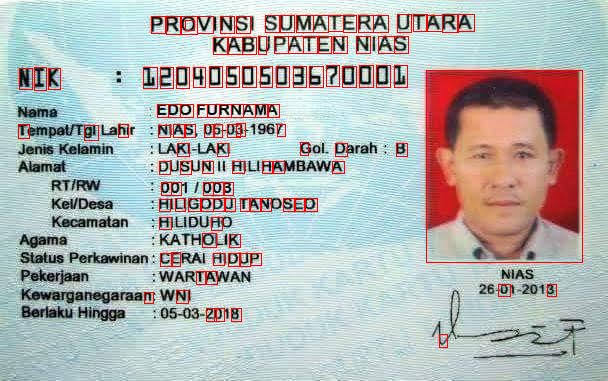

In [22]:
import cv2
from google.colab.patches import cv2_imshow

# Lokasi hasil pelat
image = cv2.imread("/content/drive/MyDrive/PCVK/KTP_More/ktp5.png")

# Filtering
blurred = cv2.GaussianBlur(image, (5, 5), 0.5)

# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)

# Apply morphological operations (opening) to separate characters or objects
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
bw_closing = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)

# Temukan kontur pada gambar tepi
contours, hierarchy = cv2.findContours(bw_closing, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada gambar asli
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 5 and w >= 10 and float(ras) <= 1:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 8 and float(ras) <= 1:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Tampilkan gambar dengan kontur
cv2_imshow(image)

In [23]:
# Potong gambar untuk mendapatkan region NIK
cropped = image[55:100, 130:420]

In [24]:
!sudo apt install tesseract-ocr-ind

!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 9 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 2s (3,013 kB/s)
debconf: unable to init

In [26]:
import cv2
import pytesseract

# Potong gambar untuk mendapatkan region NIK
cropped = image[55:100, 130:420]

# Konversi gambar ke dalam format grayscale
gray_nik = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)

# Contoh praproses: peningkatan kontras
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
preprocessed_nik = clahe.apply(gray_nik)

# Praproses morfologi (closing)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
morphed_nik = cv2.morphologyEx(preprocessed_nik, cv2.MORPH_CLOSE, kernel)

# Praproses segmentasi teks menggunakan threshold dinamis
_, threshold_nik = cv2.threshold(morphed_nik, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Contoh segmentasi teks menggunakan pytesseract
custom_config = r'--oem 3 --psm 6 outputbase digits'
nik_text = pytesseract.image_to_string(threshold_nik, config=custom_config)

# Tampilkan hasil pengenalan NIK
print("NIK pada e-KTP: ", nik_text)

NIK pada e-KTP:  22040505035670004

